# 1. Spielzeugdatensatz

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import load_mnist
%load_ext version_information

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


1. Erzeugen Sie 200 zweidimensionale Trainingsdatenpunkte mithilfe einer Gleichverteilung
über dem Gebiet [−6, 6]×[−6, 6]. Speichern Sie diese in einer 200×2 Designmatrix.

In [8]:
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))
X.shape

(200, 2)

2. Die Klassenlabels 0 und 1 werden so vergeben, dass alle Datenpunkte im 1. und 3.
Quadranten das Label 1 und im 2. und 4. Quadranten das Label 0 erhalten. Speichern
Sie die Labels in einem Array.

In [9]:
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_train = X
y_train = y_ges

3. Erzeugen Sie einen gleich großen Testdatensatz nach demselben Prinzip. Stellen Sie
beide Datensätze zur Überprüfung als Scatterplot dar.

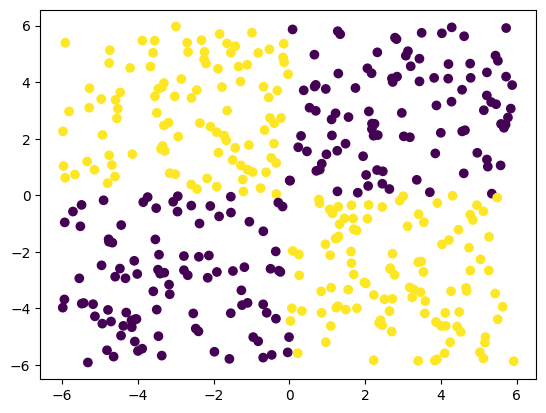

In [12]:
# Testmatrix erzeugen
X1 = np.random.uniform(-6,6,200)
X2 = np.random.uniform(-6,6,200)
X = np.column_stack((X1,X2))

# Klassenlabels entsprechend Quadrant vergeben
x1 = X[:,0]<0
x2 = X[:,1]>0
x_q1 = x1*x2
y_q1 = x_q1*1

x3 = X[:,0]>0
x4 = X[:,1]<0
x_q3 = x3*x4
y_q3 = x_q3*1 

y_ges = y_q1 + y_q3 
y_ges = np.array([y_ges]).T

X_test = X
y_test = y_ges

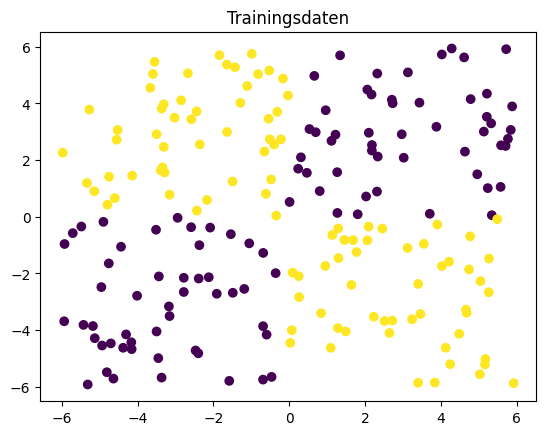

In [13]:
plt.title("Trainingsdaten")
plt.scatter(X_train[:,0], X_train[:,1],c=y_train)

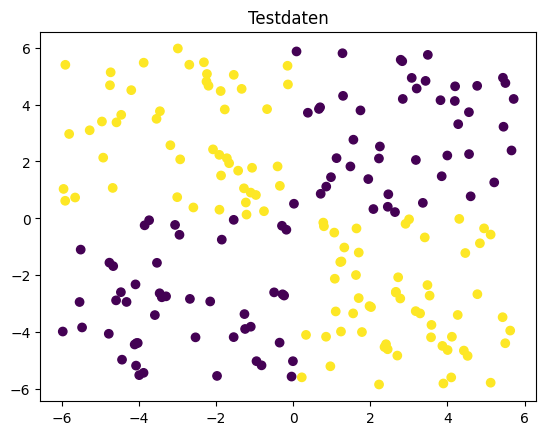

In [14]:
plt.title("Testdaten")
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)

4. Das in der Vorlesung dargestellte Experiment operiert nicht direkt auf den Inputdaten,
sondern auf 2 Merkmalen, die mithilfe zweier Neuronen mit fixem Gewichtsvektor
berechnet werden: ein Neuron teilt die Inputebene waagrecht entlang der x-Achse, das
andere senkrecht entlang der y-Achse. Wie muss der Gewichtsvektor für das jeweilige
Neuron aussehen?

In [20]:
w1 =np.array ([(1,0)])
w2 = np.array ([(0,1)])
w1*X_train #neuron 1
w2*X_train #neuron 2
print(w1)
print(w2)

[[1 0]]
[[0 1]]


5. Berechnen Sie die Entscheidungsfunktion beider Neuron mit der im Beispielcode
angegebenen sigmoiden Aktivierungsfunktion auf einem 100 × 100-Gitter innerhalb
des Gebietes [−6, 6] × [−6, 6] und stellen Sie diese zur Überprüfung als Farbbild dar.

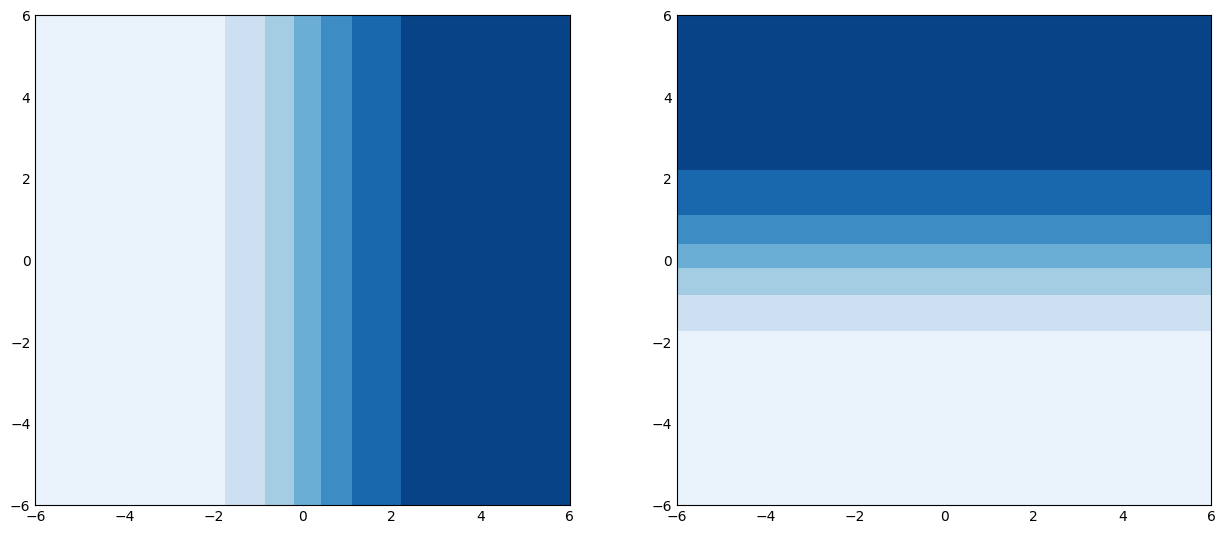

In [41]:
# Sigmoid (vektorisiert)
# Sigmoid-Aktivierungsfunktion
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Funktion zur Berechnung der Entscheidungsfunktion eines Neurons
def Entscheidungsfunktion(x, y, axis):
    if axis == 'x':
        return sigmoid(x)
    elif axis == 'y':
        return sigmoid(y)

# Gitter erstellen
x_vals = np.linspace(-6, 6, 100)
y_vals = np.linspace(-6, 6, 100)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)

# Neuron 1: teilt die Inputebene waagrecht entlang der x-Achse
neuron1 = Entscheidungsfunktion(x_grid, y_grid, 'x')

# Neuron 2: teilt die Inputebene senkrecht entlang der y-Achse
neuron2 = Entscheidungsfunktion(x_grid, y_grid, 'y')

# Darstellung der Ergebnisse als Farbbilder
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.contourf(x_grid, y_grid, neuron1)

plt.subplot(1, 2, 2)
plt.contourf(x_grid, y_grid, neuron2)

plt.show()

6. Da die Eingangsneuronen nicht mittrainiert werden, können wir deren Output schon
im Vorfeld berechnen. Erzeugen Sie dazu neue Designmatritzen für den Trainings und
Testdatensatz, so dass die erste Spalte den Output des ersten Neurons und die
zweite Spalte den Output des zweiten Neurons enthält. Erzeugen Sie auch eine entsprechende
Designmatrix für Ihr 100 × 100-Gitter, das wir später zu Darstellungszwecken
brauchen werden. Wichtig: arbeiten Sie im Folgenden nur mit diesen transformierten
Designmatritzen, um korrekte Ergebnisse zu erhalten!

In [42]:
def create_design_matrix(x_vals, y_vals):
    x_grid, y_grid = np.meshgrid(x_vals, y_vals)
    neuron_x_output = Entscheidungsfunktion(x_grid, y_grid, 'x').flatten()
    neuron_y_output = Entscheidungsfunktion(x_grid, y_grid, 'y').flatten()
    design_matrix = np.column_stack((neuron_x_output, neuron_y_output))
    return design_matrix

# Gitter für Trainingsdaten erstellen
x_train_vals = np.linspace(-6, 6, 100)
y_train_vals = np.linspace(-6, 6, 100)

# Designmatrix für Trainingsdaten erstellen
train_design_matrix = create_design_matrix(x_train_vals, y_train_vals)

# Gitter für Testdaten erstellen (nehmen wir an, es ist ein anderes Gitter als das für das 100x100-Gitter)
x_test_vals = np.linspace(-6, 6, 50)
y_test_vals = np.linspace(-6, 6, 50)

# Designmatrix für Testdaten erstellen
test_design_matrix = create_design_matrix(x_test_vals, y_test_vals)

# Gitter für das 100x100-Gitter erstellen
x_grid_vals = np.linspace(-6, 6, 100)
y_grid_vals = np.linspace(-6, 6, 100)

# Designmatrix für das 100x100-Gitter erstellen
grid_design_matrix = create_design_matrix(x_grid_vals, y_grid_vals)


# 2. Training eines MLPs auf den Spielzeugdaten

In [11]:
%version_information

Software versions
Python 3.12.0 64bit [MSC v.1935 64 bit (AMD64)]
IPython 8.16.1
OS Windows 10 10.0.19045 SP0
Mon Dec 11 15:57:39 2023 Mitteleuropäische Zeit